In [181]:
import numpy as np
import matplotlib.pyplot as plt

#Define Rotation Matrix (4X4)
class Rotation:
    def E():
        E = np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,1,0],
                      [0,0,0,0]])
        return E
    
    def x(theta):
        theta = np.deg2rad(theta)
        Rot_x = np.array([[1,0,0,0],
                         [0,np.cos(theta),-np.sin(theta),0],
                         [0,np.sin(theta),np.cos(theta),0],
                         [0,0,0,0]])
        return Rot_x
    
    def y(theta):
        theta = np.deg2rad(theta)
        Rot_y = np.array([[np.cos(theta), 0, np.sin(theta),0],
                         [0,1,0,0],
                         [-np.sin(theta),0, np.cos(theta),0],
                         [0,0,0,0]])
        return Rot_y
    
    def z(theta):
        theta = np.deg2rad(theta)
        Rot_z = np.array([[np.cos(theta),-np.sin(theta),0,0],
                         [np.sin(theta),np.cos(theta), 0,0],
                         [0,0,1,0],
                         [0,0,0,0]])
        return Rot_z
    
#Define Translation Matrix (4X4)
def Translation(x,y,z):
    P = np.array([[0,0,0,x],
                 [0,0,0,y],
                 [0,0,0,z],
                 [0,0,0,1]])
    return P

#calculate Homogeneous Transformation marix
def HT_matrix(R,P):
    #Note : R&P are np_array form
    H = R + P
    return H

In [182]:
import numpy as np
import matplotlib.pyplot as plt

#Skeleton Model : Human`s Leg
#Method : Homogeneous Transformation matrix

##valuable initialize
#joint[i+1] = theta[i]
#Center of Hip joint valuable (index 0)
#Right Leg joint valuables (index 1~6, 6 joints)
#Left Leg joint valuables (index 7~12, 6 joints)
theta = np.zeros(13)

#Link[i+1] = theta[i]
#Center Link (index 0, Link1)
#Right Leg Links (index 1~6, 6 Links/ L3,L4,L7 = 0)
#Left Leg Links (index 7~12, 6 Links/ L9,L10,L13 = 0)
#Right Leg Link 
Link = [1,1,0,0,2,2,0,1,0,0,2,2,0]

#define Base point(J0)
Base_point = np.array([10,10,10])

def skeleton_HT(theta,Link):
    ## Center of mass
    # Base(J0) to J1
    # Rotation : none, translation : none
    R0_1 = Rotation.E()
    P0_1 = Translation(0,0,0)
    H0_1 = HT_matrix(R0_1,P0_1)

    ## Center of Hip
    # J1 to J2
    # Rotation : Z1_axis (-90'<theta1<90', ' is degree.), translation : -Z1_axis direction L1
    R1_2 = Rotation.z(theta[0])
    P1_2 = Translation(0,0,-Link[0])
    H1_2 = HT_matrix(R1_2,P1_2)

    #####------------Right Leg Modeling Start!-------------------------
    ## Pelvis
    #J2 to J3
    # Rotation : Y2_axis (-90'<theta2<90', ' is degree.), translation : -Y2_axis direction L2
    R2_3 = Rotation.y(theta[1])
    P2_3 = Translation(0,-Link[1],0)
    H2_3 = HT_matrix(R2_3,P2_3)

    #J3 to J4
    # Rotation : Z3_axis (-90'<theta3<90', ' is degree.), translation : none, L3 = 0
    R3_4 = Rotation.z(theta[2])
    P3_4 = Translation(0,0,0)
    H3_4 = HT_matrix(R3_4,P3_4)

    #J4 to J5
    # Rotation : X4_axis (-90'<theta4<90', ' is degree.), translation : none, L4 = 0
    R4_5 = Rotation.x(theta[3])
    P4_5 = Translation(0,0,0)
    H4_5 = HT_matrix(R4_5,P4_5)


    ## Knee
    #J5 to J6
    # Rotation : Y5_axis (0'<theta5<180', ' is degree.), translation : -Z5_axis direction L5
    R5_6 = Rotation.y(theta[4])
    P5_6 = Translation(0,0,-Link[4])
    H5_6 = HT_matrix(R5_6,P5_6)

    ## Ankle
    #J6 to J7
    # Rotation : Y6_axis (-90'<theta6<90', ' is degree.), translation : -Z6_axis direction L6
    R6_7 = Rotation.y(theta[5])
    P6_7 = Translation(0,0,-Link[5])
    H6_7 = HT_matrix(R6_7,P6_7)

    #J7 to J8
    # Rotation : X7_axis (-90'<theta7<90', ' is degree.), translation : none, L7 = 0
    R7_8 = Rotation.x(theta[6])
    P7_8 = Translation(0,0,0)
    H7_8 = HT_matrix(R7_8,P7_8)

    #####-----------Right Leg Modeling End----------------------


    #####------------Left Leg Modeling Start!--------------------

    ## Pelvis
    #J2 to J9
    # Rotation : Y2_axis (-90'<theta8<90', ' is degree.), translation : +Y2_axis direction L8
    R2_9 = Rotation.y(theta[7])
    P2_9 = Translation(0,Link[7],0)
    H2_9 = HT_matrix(R2_9,P2_9)
    
    ###kinematic chain rule
    #J8 to J2
    #inverse transformation
    H2_8 = H2_3.dot(H3_4).dot(H4_5).dot(H5_6).dot(H6_7).dot(H7_8)
    P2_8 = np.array([H2_8[0][3],
                     H2_8[1][3],
                     H2_8[2][3]])
    R2_8 = np.array([[H2_8[0][0],H2_8[0][1],H2_8[0][2],0],
                     [H2_8[1][0],H2_8[1][1],H2_8[1][2],0],
                     [H2_8[2][0],H2_8[2][1],H2_8[2][2],0],
                     [0,0,0,0]])
    R8_2 = np.transpose(R2_8)
    P8_2 = np.dot(-R8_2[:3,:3],P2_8)
    P8_2 = [[0,0,0,P8_2[0]],
            [0,0,0,P8_2[1]],
            [0,0,0,P8_2[2]],
            [0,0,0,1]]
    H8_2 = HT_matrix(R8_2,P8_2)
                 
    
    #J8 to J9
    H8_9 = H8_2.dot(H2_9)
    
    #J9 to J10
    # Rotation : Z9_axis (-90'<theta9<90', ' is degree.), translation : none, L9 = 0
    R9_10 = Rotation.z(theta[8])
    P9_10 = Translation(0,0,0)
    H9_10 = HT_matrix(R9_10,P9_10)

    #J10 to J11
    # Rotation : X10_axis (-90'<theta10<90', ' is degree.), translation : none, L10 = 0
    R10_11 = Rotation.x(theta[9])
    P10_11 = Translation(0,0,0)
    H10_11 = HT_matrix(R10_11,P10_11)

    ## Knee
    #J11 to J12
    # Rotation : Y11_axis (0'<theta11<180', ' is degree.), translation : -Z11_axis direction L11
    R11_12 = Rotation.y(theta[10])
    P11_12 = Translation(0,0,-Link[10])
    H11_12 = HT_matrix(R11_12,P11_12)

    ## Ankle
    #J12 to J13
    # Rotation : Y12_axis (-90'<theta12<90', ' is degree.), translation : -Z12_axis direction L12
    R12_13 = Rotation.y(theta[11])
    P12_13 = Translation(0,0,-Link[11])
    H12_13 = HT_matrix(R12_13,P12_13)

    #J13 to J14
    # Rotation : X13_axis (-90'<theta13<90', ' is degree.), translation : none, L13 = 0
    R13_14 = Rotation.x(theta[12])
    P13_14 = Translation(0,0,0)
    H13_14 = HT_matrix(R13_14,P13_14)

    #####------------Left Leg Modeling End--------------------
    
    H_relative = [H0_1,H1_2,H2_3,H3_4,H4_5,H5_6,H6_7,H7_8,
                  H8_9,H9_10,H10_11,H11_12,H12_13,H13_14]
    
    return H_relative


In [183]:
import numpy as np

def ForwardKinematics(skeleton_HT):
    #initialize
    num = 0
    HT_absolute = [0 for i in skeleton_HT]
    #Base(J0) = J1
    HT_absolute[0] = skeleton_HT[0]
    
    for i in skeleton_HT:
        
        if num == 0:
            HT_absolute[0] = skeleton_HT[0]
            num = num + 1
            
        else: 
            HT_absolute[num] = HT_absolute[num-1].dot(i)
            num = num + 1
            
    return HT_absolute

In [199]:
theta[0] = 0
theta[1] = 0
theta[2] = 0
theta[3] = 90
theta[4] = 90
theta[5] = 0
theta[6] = 0
theta[7] = 0
theta[8] = 0
theta[9] = 0
theta[10] = 0
theta[11] = 0
theta[12] = 0

model = skeleton_HT(theta,Link)
P_result = ForwardKinematics(model)
P_result


[array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0., -1.],
        [ 0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0., -1.],
        [ 0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  1.]]),
 array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00],
        [ 0.000000e+00,  6.123234e-17, -1.000000e+00, -1.000000e+00],
        [ 0.000000e+00,  1.000000e+00,  6.123234e-17, -1.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]]),
 array([[ 6.12323400e-17,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 1.00000000e+00,  6.12323400e-17, -6.12323400e-17,
          1.00000000e+00],
        [-6.12323400e-17,  1.00000000e+00,  3.74939946e-33,
         -1.00000000e+00],
 

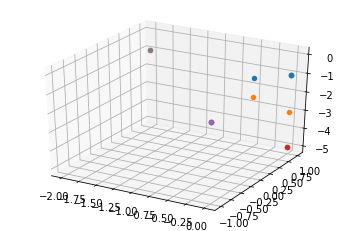

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

num = 0
for i in P_result:
    ax.scatter(P_result[num][0][3],P_result[num][1][3],P_result[num][2][3])
    num = num + 1


AttributeError: 'list' object has no attribute 'size'

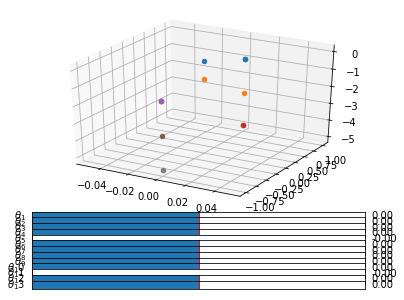

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
def drawVector(fig, pointA, pointB, **kwargs):
    ms = kwargs.get('mutation_scale', 20)
    ars = kwargs.get('arrowstyle', '-')
    lc = kwargs.get('lineColor', 'k')
    pc = kwargs.get('projColor', 'k')
    pointEnable = kwargs.get('pointEnable', True)
    projOn = kwargs.get('proj', True)
    lineStyle = kwargs.get('lineStyle', '-')
    annotationString = kwargs.get('annotationString', '')
    lineWidth = kwargs.get('lineWidth', 1)

    if (3 <= pointA.size <= 4):
        xs = [pointA[0], pointB[0]]
        ys = [pointA[1], pointB[1]]
        zs = [pointA[2], pointB[2]]
    else:
        xs = [pointA[0,3], pointB[0,3]]
        ys = [pointA[1,3], pointB[1,3]]
        zs = [pointA[2,3], pointB[2,3]]

    out = Arrow3D(xs, ys, zs, mutation_scale=ms, arrowstyle=ars, color=lc, linestyle=lineStyle, linewidth=lineWidth)
    fig.add_artist(out)

#     if pointEnable: fig.scatter(xs[1], ys[1], zs[1], color='k', s=50)

#     if projOn:
#         fig.plot(xs, ys, [0, 0], color=pc, linestyle='--')
#         fig.plot([xs[0], xs[0]], [ys[0], ys[0]], [0, zs[0]], color=pc, linestyle='--')
#         fig.plot([xs[1], xs[1]], [ys[1], ys[1]], [0, zs[1]], color=pc, linestyle='--')

#     if annotationString != '':
#         fig.text(xs[1], ys[1], zs[1], annotationString, size=15, zorder=1, color='k') 
        
#visualization
def update(val):
    theta = [s1Angle.val,s2Angle.val,s3Angle.val,s4Angle.val,s5Angle.val,s6Angle.val,s7Angle.val,
             s8Angle.val,s9Angle.val,s10Angle.val,s11Angle.val,s12Angle.val,s13Angle.val]
    
    Link = [1,1,0,0,2,2,0,1,0,0,2,2,0]
    
    P_result = ForwardKinematics(theta,Link)
    
    ax.cla()
    
    num = 0
    for i in P_result:
        ax.scatter(P_result[num][0][3],P_result[num][1][3],P_result[num][2][3])
        num = num + 1
        
    num = 0
    for i in P_result:
        if num != 14:
            drawVector(ax,[P_result[num][0][3],P_result[num][1][3],P_result[num][2][3]],
                       [P_result[num+1][0][3],P_result[num+1][1][3],P_result[num+1][2][3]])
            num = num + 1

#     drawVector(ax,P_result[0],P_result[1])
#     drawVector(ax,P_result[1],P_result[2])
#     drawVector(ax,P_result[2],P_result[3])
#     drawVector(ax,P_result[3],P_result[4])
#     drawVector(ax,P_result[4],P_result[5])
#     drawVector(ax,P_result[5],P_result[6])
    
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.subplots_adjust(bottom=0.30,top=1.0)

th1Angle = plt.axes([0.125, 0.26, 0.77, 0.03])
th2Angle = plt.axes([0.125, 0.24, 0.77, 0.03])
th3Angle = plt.axes([0.125, 0.22, 0.77, 0.03])
th4Angle = plt.axes([0.125, 0.20, 0.77, 0.03])
th5Angle = plt.axes([0.125, 0.18, 0.77, 0.03])
th6Angle = plt.axes([0.125, 0.16, 0.77, 0.03])
th7Angle = plt.axes([0.125, 0.14, 0.77, 0.03])
th8Angle = plt.axes([0.125, 0.12, 0.77, 0.03])
th9Angle = plt.axes([0.125, 0.10, 0.77, 0.03])
th10Angle = plt.axes([0.125, 0.08, 0.77, 0.03])
th11Angle = plt.axes([0.125, 0.06, 0.77, 0.03])
th12Angle = plt.axes([0.125, 0.04, 0.77, 0.03])
th13Angle = plt.axes([0.125, 0.02, 0.77, 0.03])

s1Angle = Slider(th1Angle, r'$ \theta_1 $', -90.0, 90.0, valinit=0)
s2Angle = Slider(th2Angle, r'$ \theta_2 $', -90.0, 90.0, valinit=0)
s3Angle = Slider(th3Angle, r'$ \theta_3 $', -90.0, 90.0, valinit=0)
s4Angle = Slider(th4Angle, r'$ \theta_4 $', -90.0, 90.0, valinit=0)
s5Angle = Slider(th5Angle, r'$ \theta_5 $', -0.0, 180.0, valinit=0)
s6Angle = Slider(th6Angle, r'$ \theta_6 $', -90.0, 90.0, valinit=0)
s7Angle = Slider(th7Angle, r'$ \theta_7 $', -90.0, 90.0, valinit=0)
s8Angle = Slider(th8Angle, r'$ \theta_8 $', -90.0, 90.0, valinit=0)
s9Angle = Slider(th9Angle, r'$ \theta_9 $', -90.0, 90.0, valinit=0)
s10Angle = Slider(th10Angle, r'$ \theta_10 $', -90.0, 90.0, valinit=0)
s11Angle = Slider(th11Angle, r'$ \theta_11 $', -0.0, 180.0, valinit=0)
s12Angle = Slider(th12Angle, r'$ \theta_12 $', -90.0, 90.0, valinit=0)
s13Angle = Slider(th13Angle, r'$ \theta_13 $', -90.0, 90.0, valinit=0)


num = 0
for i in P_result:
    ax.scatter(P_result[num][0][3],P_result[num][1][3],P_result[num][2][3])
    num = num + 1
        
num = 0
for i in P_result:
    if num != 14:
        drawVector(ax,[P_result[0][0][3],P_result[0][1][3],P_result[0][2][3]],
                   [P_result[1][0][3],P_result[1][1][3],P_result[1][2][3]])
        num = num + 1

s1Angle.on_changed(update)
s2Angle.on_changed(update)
s3Angle.on_changed(update)
s4Angle.on_changed(update)
s5Angle.on_changed(update)
s6Angle.on_changed(update)
s7Angle.on_changed(update)
s8Angle.on_changed(update)
s9Angle.on_changed(update)
s10Angle.on_changed(update)
s11Angle.on_changed(update)
s12Angle.on_changed(update)
s13Angle.on_changed(update)

#ax.view_init(azim=-150, elev=30)
plt.show()

In [179]:
(P_result[0][0][3],P_result[0][1][3],P_result[0][2][3])

(0, 0, 0)

In [177]:
[P_result[1][0][3],P_result[1][1][3],P_result[1][2][3]]

[0.0, 0.0, -1.0]